# **Prediksi Kualitas Udara di Indonesia dengan Algoritma Support Vector Machine**
oleh Ma'mur Zaky Nurrokhman

## Daftar Isi

* [**Latar Belakang**](#latar-belakang)
* [**Tujuan**](#tujuan)
* [**Tahap Pembuatan dan Analisis Hasil**](#tahap-pembuatan-dan-analisis-hasil)
    * [Import Library](#import-library)
    * [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
        * [Dataset Indeks Standar Pencemar Udara (ISPU) di SPKU Jakarta tahun 2021](#dataset-indeks-standar-pencemar-udara-ispu-di-spku-jakarta-tahun-2021)
        * [Dataset Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta tahun 2021](#dataset-indeks-standar-pencemar-udara-ispu-di-provinsi-dki-jakarta-tahun-2021)
        * [Dataset Indeks Standar Pencemar Udara (ISPU) di Yogyakarta tahun 2021](#dataset-indeks-standar-pencemar-udara-ispu-di-yogyakarta-tahun-2021)
    * [Data Preprocessing](#data-preprocessing)
    * [Training Model](#training-model)
    * [Evaluation](#training-model)

## **Latar Belakang**

Beberapa waktu yang lalu, terjadi polusi udara yang cukup parah di Jakarta. Polusi udara tersebut membuat langit Jakarta menjadi gelap dan berkabut tebal serta mengakibatkan banyak orang mengalami gangguan kesehatan terutama pernafasan. Akibatnya, pemerintah memberlakukan berbagai kebijakan-kebijakan untuk mengatasi masalah tersebut seperti pemberlakuan *Work From Home (WFH)*, membuat hujan buatan, menyemprot air dari atap gedung-gedung tinggi, dan masih banyak lagi. Dalam memberlakukan kebijakan-kebijakan tersebut, pemerintah tidak serta merta membuatnya begitu saja. Mereka tentunya memiliki data tentang polusi udara di Jakarta yang diambil dari sebuah alat yaitu **Stasiun Pemantau Kualitas Udara (SPKU)** yang digunakan untuk memberikan data terkait kualitas udara di sekitar alat tersebut. Namun, harga SPKU terbilang cukup mahal hingga mencapai milyaran rupiah. Selain itu, tidak semua daerah di Indonesia memiliki SPKU untuk pemantauan kualitas udara karena pada dasarnya SPKU ini terbatas hanya ditujukan untuk tempat-tempat tertentu saja. Padahal setiap daerah di Indonesia seharusnya berhak untuk mendapatkan kualitas udara yang bersih. Selain itu, data yang dikirimkan oleh SPKU kepada publik tidak cukup cepat dan terkini yang mana perhitungan **Indeks Standar Pencemar Udara (ISPU)** yang merupakan standar perhitungan kondisi kualitas udara hanya disampaikan paling sedikit setiap jam 09.00 dan jam 15.00. Hal tersebut dapat membuat masyarakat sekitar lambat dalam membuat tindakan pencegahan apabila terjadi kondisi yang kritis.<br>
Melihat masalah tersebut, saya membuat sebuah model machine learning untuk memprediksi kualitas udara di Indonesia. Model machine learning ini dilatih menggunakan algoritma **Support Vector Machine (SVM)** dengan menggunakan data dari ISPU yang dihasilkan dari SPKU di beberapa tempat. Dengan menggunakan model machine learning, diharapkan dapat menambah efisiensi dan fleksibilitas dalam memprediksi dan memantau kualitas udara di Indonesia.

## **Tujuan**

Project machine learning berupa Prediksi Kualitas Udara dibuat dengan tujuan sebagai berikut:
1. Membuat model machine learning untuk memprediksi kualitas udara
2. Sebagai alternatif pengukur kualitas udara yang sudah ada seperti **Stasiun Pemantau Kualitas Udara (SPKU)**
3. Menambah kecepatan dalam mendapatkan update data kualitas udara di sekitar
4. Efisiensi biaya pembuatan
5. Fleksibilitas penggunaan

## **Tahap Pembuatan dan Analisis Hasil**

## Import Library

Pada tahap awal dilakukan import beberapa library yang dibutuhkan seperti Pandas, Matplotlib, beberapa library dari Scikit Learn, dan Imbalanced Learn. Berikut merupakan penjelasan singkat dari kegunaan library-library tersebut:
1. **Pandas**
   <br>
   `pandas` merupakan library yang umum digunakan untuk analisis data dan pembuatan model machine learning. `pandas` digunakan untuk mengolah dan memanipulasi data menggunakan bahasa pemrograman python.
2. **Matplotlib**
<br>
Library `matplotlib` digunakan untuk visualisasi data agar data mudah untuk dibaca dan dipahami.
1. **Scikit Learn**
<br>
Scikit Learn (`sklearn`) merupakan library yang digunakan untuk pembuatan model machine learning. Terdapat beberapa tools dari Scikit Learn yang digunakan pada project ini, yaitu sebagai berikut:
    * **Support Vector Machine**
    <br>
    Pada project machine learning ini menggunakan **Support Vector Machine (SVM)** sebagai algoritma untuk melatih model. Model machine learning yang dibuat berupa model klasifikasi yang akan mengelompokkan/mengklasifikasikan kategori berdasarkan nilai-nilai yang diberikan pada parameter yang disediakan sehingga jenis **SVM** yang digunakan yaitu **Support Vector Classifier** (`SVC`).
    * **Preprocessing - Standard Scaler**
    <br>
    `StandardScaler` merupakan tools untuk melakukan standarisasi data yang merupakan teknik konversi nilai-nilai dari suatu feature agar memiliki skala yang sama. Dengan skala yang sama, maka hal tersebut akan menambah akurasi dan performa dari model machine learning yang dibuat.
    * **Model Selection - Train Test Split**
    <br>
    Sesuai dengan namanya, `train_test_split` digunakan untuk membagi antara data latih (training data) dan data uji (test data).
    * **Metrics**
    <br>
    Library `sklearn.metrics` digunakan untuk mengevaluasi kinerja atau performa dari model machine learning yang telah dilatih.
1. **Imbalanced Learn**
<br>
Tidak semua dataset memiliki jumlah data yang seimbang pada setiap label/target pada dataset tersebut. Seringkali terdapat ketidakseimbangan pada jumlah data yang diberikan. Oleh karena itu dibutuhkan sebuah library yang dapat menyeimbangkan jumlah data pada masing-masing label pada dataset. Penyeimbangan data dilakukan dengan tujuan agar model machine learning tidak memiliki ketimpangan dalam mengenali setiap label. Teknik penyeimbangan data yang digunakan pada project ini adalah `SMOTE` (*Synthetic Minority Over-sampling Technique*).

In [1]:
# import library yang dibutuhkan

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from imblearn.over_sampling import SMOTE

## Exploratory Data Analysis (EDA)

### Dataset Indeks Standar Pencemar Udara (ISPU) di SPKU Jakarta tahun 2021

Dataset ISPU di SPKU Jakarta tahun 2021 diambil dari situs [Open Data Jakarta](https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2021). Dataset tersebut terbagi berdasarkan rentang waktu per bulan. Dataset dari masing-masing bulan akan digabungkan menjadi satu dataframe. Berdasarkan deskripsi yang diberikan pada situs tersebut terdapat penjelasan pada setiap variabel atau atribut dari dataset yaitu sebagai berikut:
|Atribut|Keterangan|
|-|-|
|tanggal|Tanggal pengukuran kualitas udara|
|stasiun|Lokasi pengukuran di stasiun|
|pm10|Partikulat salah satu parameter yang diukur|
|pm25|Partikulat salah satu parameter yang diukur|
|so2|Sulfida (dalam bentuk SO2) salah satu parameter yang diukur|
|co|Carbon Monoksida salah satu parameter yang diukur|
|o3|Ozon salah satu parameter yang diukur|
|no2|Nitrogen dioksida salah satu parameter yang diukur|
|max|Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama|
|critical|Parameter yang hasil pengukurannya paling tinggi|
|categori|Kategori hasil perhitungan indeks standar pencemaran udara|

**NB** : Terdapat beberapa kesalahan penulisan (typo) pada dataset seperti salah kolom pada pengisian nilainya sehingga perlu diedit di Excel. Dataset yang diimport di python notebook ini merupakan dataset yang sudah diperbaiki beberapa typo-nya agar lebih mudah untuk diolah.

In [2]:
# import dataset indeks standar pencemar udara (ISPU) di stasiun pemantau kualitas udara (SPKU) Jakarta pada tahun 2021

df_spku_jan = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-spku-bulan-januari-tahun-2021.csv')
df_spku_feb = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-spku-bulan-februari-tahun-2021.csv')
df_spku_mar = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-spku-bulan-maret-tahun-2021.csv')
df_spku_apr = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-spku-bulan-april-tahun-2021.csv')
df_spku_may = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-spku-bulan-mei-tahun-2021.csv')
df_spku_jun = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-spku-bulan-juni-tahun-2021.csv')
df_spku_jul = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-spku-bulan-juli-tahun-2021.csv')
df_spku_aug = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-spku-bulan-agustus-tahun-2021.csv')
df_spku_sep = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-spku-bulan-september-tahun-2021.csv')
df_spku_oct = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-spku-bulan-oktober-tahun-2021.csv')
df_spku_nov = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-spku-bulan-november-tahun-2021.csv')
df_spku_dec = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-spku-bulan-desember-tahun-2021.csv')

In [3]:
# menampilkan 5 data teratas di bulan Januari

df_spku_jan.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38,53,29,6,31,13,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27,46,27,7,47,7,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44,58,25,7,40,13,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30,48,24,4,32,7,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38,53,24,6,31,9,53,PM25,SEDANG


In [4]:
# menampilkan 5 data teratas di bulan Februari

df_spku_feb.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-02-01,DKI1 (Bunderan HI),59,79,21,26,15,31,79,PM25,SEDANG
1,2021-02-02,DKI1 (Bunderan HI),30,46,21,14,16,24,46,PM25,BAIK
2,2021-02-03,DKI1 (Bunderan HI),23,33,19,11,14,19,33,PM25,BAIK
3,2021-02-04,DKI1 (Bunderan HI),36,53,23,14,12,24,53,PM25,SEDANG
4,2021-02-05,DKI1 (Bunderan HI),29,36,20,14,12,21,36,PM25,BAIK


In [5]:
# menampilkan 5 data teratas di bulan Maret

df_spku_mar.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-03-01,DKI1 (Bunderan HI),37,60,20,12,12,17,60,PM25,SEDANG
1,2021-03-02,DKI1 (Bunderan HI),38,55,20,15,14,28,55,PM25,SEDANG
2,2021-03-03,DKI1 (Bunderan HI),49,67,19,21,17,35,67,PM25,SEDANG
3,2021-03-04,DKI1 (Bunderan HI),51,75,22,18,19,31,75,PM25,SEDANG
4,2021-03-05,DKI1 (Bunderan HI),52,69,20,16,16,30,69,PM25,SEDANG


In [6]:
# menampilkan 5 data teratas di bulan April

df_spku_apr.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-04-01,DKI1 (Bunderan HI),26,42,22,11,13,19,42,PM25,BAIK
1,2021-04-02,DKI1 (Bunderan HI),41,54,27,11,17,19,54,PM25,SEDANG
2,2021-04-03,DKI1 (Bunderan HI),25,42,20,8,18,22,42,PM25,BAIK
3,2021-04-04,DKI1 (Bunderan HI),57,78,21,23,14,33,78,PM25,SEDANG
4,2021-04-05,DKI1 (Bunderan HI),52,69,22,15,18,27,69,PM25,SEDANG


In [7]:
# menampilkan 5 data teratas di bulan Mei

df_spku_may.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-05-01,DKI1 (Bunderan HI),52,71,23,10,20,33,71,PM25,SEDANG
1,2021-05-02,DKI1 (Bunderan HI),50,67,22,9,18,17,67,PM25,SEDANG
2,2021-05-03,DKI1 (Bunderan HI),53,70,26,10,20,20,70,PM25,SEDANG
3,2021-05-04,DKI1 (Bunderan HI),59,77,31,14,14,26,77,PM25,SEDANG
4,2021-05-05,DKI1 (Bunderan HI),58,82,22,18,14,38,82,PM25,SEDANG


In [8]:
# menampilkan 5 data teratas di bulan Juni

df_spku_jun.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,6/1/2021,DKI1 (Bunderan HI),59,83,22,18,19,35,83,PM25,SEDANG
1,6/2/2021,DKI1 (Bunderan HI),59,84,21,20,24,38,84,PM25,SEDANG
2,6/3/2021,DKI1 (Bunderan HI),54,76,22,20,17,41,76,PM25,SEDANG
3,6/4/2021,DKI1 (Bunderan HI),63,87,20,13,14,30,87,PM25,SEDANG
4,6/5/2021,DKI1 (Bunderan HI),59,79,23,20,19,38,79,PM25,SEDANG


In [9]:
# menampilkan 5 data teratas di bulan Juli

df_spku_jul.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,7/1/2021,DKI1 (Bunderan HI),55,76,27,14,20,31,76,PM25,SEDANG
1,7/2/2021,DKI1 (Bunderan HI),55,70,33,16,14,30,70,PM25,SEDANG
2,7/3/2021,DKI1 (Bunderan HI),58,81,33,12,19,25,81,PM25,SEDANG
3,7/4/2021,DKI1 (Bunderan HI),68,102,27,11,27,22,102,PM25,TIDAK SEHAT
4,7/5/2021,DKI1 (Bunderan HI),71,106,28,12,34,25,106,PM25,TIDAK SEHAT


In [10]:
# menampilkan 5 data teratas di bulan Agustus

df_spku_aug.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-08-01,DKI1 (Bunderan HI),51,68,25,8,29,22,68,PM25,SEDANG
1,2021-08-02,DKI1 (Bunderan HI),47,63,24,10,25,28,63,PM25,SEDANG
2,2021-08-03,DKI1 (Bunderan HI),50,68,26,11,19,35,68,PM25,SEDANG
3,2021-08-04,DKI1 (Bunderan HI),52,70,29,8,24,26,70,PM25,SEDANG
4,2021-08-05,DKI1 (Bunderan HI),52,66,29,9,21,27,66,PM25,SEDANG


In [11]:
# menampilkan 5 data teratas di bulan September

df_spku_sep.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-09-01,DKI1 (Bunderan HI),63,88,29,15,24,38,88,PM25,SEDANG
1,2021-09-02,DKI1 (Bunderan HI),60,83,29,11,30,28,83,PM25,SEDANG
2,2021-09-03,DKI1 (Bunderan HI),60,82,27,11,37,30,82,PM25,SEDANG
3,2021-09-04,DKI1 (Bunderan HI),58,77,26,10,31,28,77,PM25,SEDANG
4,2021-09-05,DKI1 (Bunderan HI),63,85,27,11,28,28,85,PM25,SEDANG


In [12]:
# menampilkan 5 data teratas di bulan Oktober

df_spku_oct.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-10-01,DKI1 (Bunderan HI),57,81,30,11,32,38,81,PM25,SEDANG
1,2021-10-02,DKI1 (Bunderan HI),67,99,32,11,30,35,99,PM25,SEDANG
2,2021-10-03,DKI1 (Bunderan HI),70,85,29,10,28,28,85,PM25,SEDANG
3,2021-10-04,DKI1 (Bunderan HI),58,82,30,11,34,29,82,PM25,SEDANG
4,2021-10-05,DKI1 (Bunderan HI),55,76,29,11,30,33,76,PM25,SEDANG


In [13]:
# menampilkan 5 data teratas di bulan November

df_spku_nov.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-11-01,DKI1 (Bunderan HI),58,85,32,16,22,41,85,PM25,SEDANG
1,2021-11-02,DKI1 (Bunderan HI),50,63,29,14,22,35,63,PM25,SEDANG
2,2021-11-03,DKI1 (Bunderan HI),49,63,33,13,21,38,63,PM25,SEDANG
3,2021-11-04,DKI1 (Bunderan HI),57,83,30,17,34,47,83,PM25,SEDANG
4,2021-11-05,DKI1 (Bunderan HI),56,75,31,19,18,46,75,PM25,SEDANG


In [14]:
# menampilkan 5 data teratas di bulan Desember

df_spku_dec.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-12-01,DKI1 (Bunderan HI),49,65,33,13,15,12,65,PM25,SEDANG
1,2021-12-02,DKI1 (Bunderan HI),28,34,31,7,15,5,34,PM25,BAIK
2,2021-12-03,DKI1 (Bunderan HI),49,31,9,19,7,49,PM25,BAIK,NaN
3,2021-12-04,DKI1 (Bunderan HI),39,52,35,13,15,9,52,PM25,SEDANG
4,2021-12-05,DKI1 (Bunderan HI),41,57,39,15,15,9,57,PM25,SEDANG


In [15]:
# menggabungkan seluruh data dari bulan Januari hingga Desember menjadi satu dataframe

df_spku_jkt = pd.concat([df_spku_jan, df_spku_feb, df_spku_mar, df_spku_apr, df_spku_may, df_spku_jun, df_spku_jul, df_spku_aug, df_spku_sep, df_spku_oct, df_spku_nov, df_spku_dec])
df_spku_jkt

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2021-01-01,DKI1 (Bunderan HI),38,53,29,6,31,13,53,PM25,SEDANG
1,2021-01-02,DKI1 (Bunderan HI),27,46,27,7,47,7,47,O3,BAIK
2,2021-01-03,DKI1 (Bunderan HI),44,58,25,7,40,13,58,PM25,SEDANG
3,2021-01-04,DKI1 (Bunderan HI),30,48,24,4,32,7,48,PM25,BAIK
4,2021-01-05,DKI1 (Bunderan HI),38,53,24,6,31,9,53,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...,...
150,2021-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,54,76,36,14,21,47,76,PM25,SEDANG
151,2021-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,44,68,20,11,21,33,68,PM25,SEDANG
152,2021-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,34,54,28,8,25,29,54,PM25,SEDANG
153,2021-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,53,75,25,15,23,44,75,PM25,SEDANG


### Dataset Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta tahun 2021

Dataset ISPU di Provinsi DKI Jakarta tahun 2021 diambil dari situs [Open Data Jakarta](https://data.jakarta.go.id/dataset/indeks-standar-pencemaran-udara-ispu-tahun-2021). Dataset tersebut terbagi berdasarkan rentang waktu per bulan sehingga akan digabungkan menjadi satu dataframe untuk memudahkan dalam pengolahan data. Berdasarkan deskripsi yang diberikan pada situs tersebut, dataset berisi mengenai Indeks Standar Pencemar Udara (ISPU) yang diukur dari 5 stasiun pemantau kualitas udara (SPKU) yang ada di Provinsi DKI Jakarta Tahun 2021. Terdapat penjelasan dari variabel-variabel atau atribut-atribut dari dataset, yaitu sebagai berikut:
|Atribut|Keterangan|
|-|-|
|tanggal|Tanggal pengukuran kualitas udara|
|pm10|Partikulat salah satu parameter yang diukur|
|pm25|Partikulat salah satu parameter yang diukur|
|so2|Sulfida (dalam bentuk SO2) salah satu parameter yang diukur|
|co|Carbon Monoksida salah satu parameter yang diukur|
|o3|Ozon salah satu parameter yang diukur|
|no2|Nitrogen dioksida salah satu parameter yang diukur|
|max|Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama|
|critical|Parameter yang hasil pengukurannya paling tinggi|
|categori|Kategori hasil perhitungan indeks standar pencemaran udara|
|location|Kode lokasi|

**NB** : *Khusus untuk dataset ini tidak termasuk bulan Januari dikarenakan tidak adanya atribut PM2.5 sehingga tidak bisa digabungkan dengan dataset yang lainnya*

In [16]:
# import dataset indeks standar pencemar udara (ISPU) di provinsi DKI Jakarta pada tahun 2021

df_jkt_feb = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-februari-tahun-2021.csv')
df_jkt_mar = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-maret-tahun-2021.csv')
df_jkt_apr = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-april-tahun-2021.csv')
df_jkt_may = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-mei-tahun-2021.csv')
df_jkt_jun = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-juni-tahun-2021.csv')
df_jkt_jul = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-juli-tahun-2021.csv')
df_jkt_aug = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-agustus-tahun-2021.csv')
df_jkt_sep = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-september-tahun-2021.csv')
df_jkt_oct = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-oktober-tahun-2021.csv')
df_jkt_nov = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-november-tahun-2021.csv')
df_jkt_dec = pd.read_csv('dataset/Indeks Standar Pencemar Udara ISPU di Jakarta Tahun 2021/indeks-standar-pencemar-udara-di-provinsi-dki-jakarta-bulan-desember-tahun-2021.csv')

In [17]:
# menampilkan 5 data teratas di bulan Februari

df_jkt_feb.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-02-01,73,126,38,26,46,34,126,PM25,TIDAK SEHAT,DKI5
1,2021-02-02,53,70,40,14,55,25,70,PM25,SEDANG,DKI3
2,2021-02-03,32,53,40,11,42,19,53,PM25,SEDANG,DKI3
3,2021-02-04,36,59,40,14,47,24,59,PM25,SEDANG,DKI5
4,2021-02-05,29,51,40,14,45,35,51,PM25,SEDANG,DKI3


In [18]:
# menampilkan 5 data teratas di bulan Maret

df_jkt_mar.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-03-01,62,97,45,13,38,18,97,PM25,SEDANG,DKI3
1,2021-03-02,55,81,50,17,53,28,81,PM25,SEDANG,DKI4
2,2021-03-03,59,83,46,21,50,35,83,PM25,SEDANG,DKI3
3,2021-03-04,62,103,45,19,49,31,103,PM25,TIDAK SEHAT,DKI4
4,2021-03-05,65,81,54,16,59,30,81,PM25,SEDANG,DKI2


In [19]:
# menampilkan 5 data teratas di bulan April

df_jkt_apr.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-04-01,28,52,41,11,43,19,52,PM25,SEDANG,DKI3
1,2021-04-02,51,70,44,11,42,19,70,PM25,SEDANG,DKI3
2,2021-04-03,39,67,42,9,57,22,67,PM25,SEDANG,DKI4
3,2021-04-04,68,103,43,30,49,37,103,PM25,TIDAK SEHAT,DKI3
4,2021-04-05,61,85,43,15,59,28,85,PM25,SEDANG,DKI3


In [20]:
# menampilkan 5 data teratas di bulan Mei

df_jkt_may.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-05-01,66,102,51,15,57,33,102,PM25,TIDAK SEHAT,DKI3
1,2021-05-02,55,89,47,13,53,17,89,PM25,SEDANG,DKI4
2,2021-05-03,61,95,50,10,51,20,95,PM25,SEDANG,DKI4
3,2021-05-04,74,113,54,18,39,26,113,PM25,TIDAK SEHAT,DKI4
4,2021-05-05,73,117,53,20,45,38,117,PM25,TIDAK SEHAT,DKI4


In [21]:
# menampilkan 5 data teratas di bulan Juni

df_jkt_jun.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-06-01,73,105,50,18,64,35,105,PM25,TIDAK SEHAT,DKI3
1,2021-06-02,68,100,54,20,76,38,100,PM25,SEDANG,DKI4
2,2021-06-03,68,93,57,20,61,41,93,PM25,SEDANG,DKI2
3,2021-06-04,66,100,48,13,76,30,100,PM25,SEDANG,DKI4
4,2021-06-05,64,93,51,20,65,38,93,PM25,SEDANG,DKI4


In [22]:
# menampilkan 5 data teratas di bulan Juli

df_jkt_jul.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-07-01,64,114,53,14,48,31,114,PM25,TIDAK SEHAT,DKI4
1,2021-07-02,68,108,56,23,40,51,108,PM25,TIDAK SEHAT,DKI4
2,2021-07-03,80,141,54,13,44,27,141,PM25,TIDAK SEHAT,DKI4
3,2021-07-04,94,161,51,15,50,25,161,PM25,TIDAK SEHAT,DKI4
4,2021-07-05,83,153,56,13,62,26,153,PM25,TIDAK SEHAT,DKI4


In [23]:
# menampilkan 5 data teratas di bulan Agustus

df_jkt_aug.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-08-01,55,86,50,9,67,22,86,PM25,SEDANG,DKI4
1,2021-08-02,52,81,50,10,59,28,81,PM25,SEDANG,DKI4
2,2021-08-03,61,104,53,12,47,35,104,PM25,TIDAK SEHAT,DKI4
3,2021-08-04,64,89,53,9,50,26,89,PM25,SEDANG,DKI2
4,2021-08-05,61,90,55,11,58,27,90,PM25,SEDANG,DKI4


In [24]:
# menampilkan 5 data teratas di bulan September

df_jkt_sep.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-09-01,79,118,55,16,32,38,118,PM25,TIDAK SEHAT,DKI4
1,2021-09-02,66,115,52,15,39,28,115,PM25,TIDAK SEHAT,DKI4
2,2021-09-03,66,111,51,11,45,30,111,PM25,TIDAK SEHAT,DKI4
3,2021-09-04,62,93,50,10,37,28,93,PM25,SEDANG,DKI4
4,2021-09-05,74,120,52,12,36,28,120,PM25,TIDAK SEHAT,DKI4


In [25]:
# menampilkan 5 data teratas di bulan Oktober

df_jkt_oct.head()

,tanggal,pm10,pm25,so2,co,o3,no3,max,critical,categori,location
0,2021-10-01,58,91,59,11,65,38,91,PM25,SEDANG,DKI4
1,2021-10-02,70,127,61,12,58,35,127,PM25,TIDAK SEHAT,DKI4
2,2021-10-03,70,96,62,11,53,28,96,PM25,SEDANG,DKI4
3,2021-10-04,62,110,60,11,64,29,110,PM25,TIDAK SEHAT,DKI4
4,2021-10-05,65,90,67,11,54,33,90,PM25,SEDANG,DKI2


In [26]:
# menampilkan 5 data teratas di bulan November

df_jkt_nov.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-11-01,64,91,77,17,48,41,91,PM25,SEDANG,DKI5
1,2021-11-02,54,77,51,18,49,35,77,PM25,SEDANG,DKI4
2,2021-11-03,52,83,51,13,73,38,83,PM25,SEDANG,DKI4
3,2021-11-04,63,95,52,17,63,47,95,PM25,SEDANG,DKI2
4,2021-11-05,64,95,52,23,46,46,95,PM25,SEDANG,DKI4


In [27]:
# menampilkan 5 data teratas di bulan Desember

df_jkt_dec.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-12-01,63,100,43,13,41,30,100,PM25,SEDANG,DKI4
1,2021-12-02,35,56,42,7,40,14,56,PM25,SEDANG,DKI4
2,2021-12-03,54,71,43,9,48,17,71,PM25,SEDANG,DKI4
3,2021-12-04,50,65,45,13,43,16,65,PM25,SEDANG,DKI3
4,2021-12-05,53,80,44,17,39,29,80,PM25,SEDANG,DKI4


In [28]:
# menggabungkan seluruh data dari bulan Februari hingga Desember menjadi satu dataframe

df_jkt = pd.concat([df_jkt_feb, df_jkt_mar, df_jkt_apr, df_jkt_may, df_jkt_jun, df_jkt_jul, df_jkt_aug, df_jkt_sep, df_jkt_oct, df_jkt_nov, df_jkt_dec])
df_jkt

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,no3
0,2021-02-01,73,126,38,26,46,34.0,126,PM25,TIDAK SEHAT,DKI5,NaN
1,2021-02-02,53,70,40,14,55,25.0,70,PM25,SEDANG,DKI3,NaN
2,2021-02-03,32,53,40,11,42,19.0,53,PM25,SEDANG,DKI3,NaN
3,2021-02-04,36,59,40,14,47,24.0,59,PM25,SEDANG,DKI5,NaN
4,2021-02-05,29,51,40,14,45,35.0,51,PM25,SEDANG,DKI3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
26,2021-12-27,75,121,61,23,40,47.0,121,PM25,TIDAK SEHAT,DKI4,NaN
27,2021-12-28,59,89,53,16,34,33.0,89,PM25,SEDANG,DKI4,NaN
28,2021-12-29,61,98,54,15,37,29.0,98,PM25,SEDANG,DKI4,NaN
29,2021-12-30,60,102,53,17,38,44.0,102,PM25,TIDAK SEHAT,DKI4,NaN


### Dataset Indeks Standar Pencemar Udara (ISPU) di Yogyakarta tahun 2021

Dataset Indeks Standar Pencemar Udara (ISPU) atau Air Quality Index (AQI) di Yogyakarta tahun 2021 diambil dari situs [Kaggle](https://www.kaggle.com/datasets/adhang/air-quality-in-yogyakarta-indonesia-2021). Dataset terbagi berdasarkan rentang waktu per bulan sehingga perlu digabungkan menjadi satu dataframe untuk memudahkan pengolahan data. Berdasarkan deskripsi yang diberikan pada situs tersebut, dataset ini berisi pengukuran polusi udara, seperti Particulate Matter (PM10, PM2.5), Sulfur Dioksida (SO2), Karbon Monoksida (CO), Ozon (O3), dan Natrium Dioksida (NO2). Pengukuran tersebut telah dikonversi menjadi Indeks Standar Polutan (PSI) atau Indeks Standar Pencemaran Udara (ISPU). Berikut merupakan detail dari atribut atau parameter yang terdapat pada dataset:
|Atribut|Keterangan|
|-|-|
|Date|Tanggal pengukuran|
|PM10|Pengukuran materi partikulat|
|PM2.5|Pengukuran materi partikulat|
|SO2|Pengukuran sulfur dioksida|
|CO|Pengukuran karbon monoksida|
|O3|Pengukuran ozon|
|NO2|Pengukuran natrium dioksida|
|Max|Nilai pengukuran tertinggi|
|Critical Component|Komponen yang memiliki nilai pengukuran tertinggi|
|Category|Kategori polusi udara, apakah baik atau tidak|

In [29]:
# import dataset indeks standar pencemar udara (ISPU) di Yogyakarta pada tahun 2021

df_jogja_jan = pd.read_csv('dataset/Air Quality in Yogyakarta 2021/psi-jogja-jan-2021.csv')
df_jogja_feb = pd.read_csv('dataset/Air Quality in Yogyakarta 2021/psi-jogja-feb-2021.csv')
df_jogja_mar = pd.read_csv('dataset/Air Quality in Yogyakarta 2021/psi-jogja-mar-2021.csv')
df_jogja_apr = pd.read_csv('dataset/Air Quality in Yogyakarta 2021/psi-jogja-apr-2021.csv')
df_jogja_may = pd.read_csv('dataset/Air Quality in Yogyakarta 2021/psi-jogja-may-2021.csv')
df_jogja_jun = pd.read_csv('dataset/Air Quality in Yogyakarta 2021/psi-jogja-jun-2021.csv')
df_jogja_jul = pd.read_csv('dataset/Air Quality in Yogyakarta 2021/psi-jogja-jul-2021.csv')
df_jogja_aug = pd.read_csv('dataset/Air Quality in Yogyakarta 2021/psi-jogja-aug-2021.csv')
df_jogja_sep = pd.read_csv('dataset/Air Quality in Yogyakarta 2021/psi-jogja-sep-2021.csv')
df_jogja_oct = pd.read_csv('dataset/Air Quality in Yogyakarta 2021/psi-jogja-oct-2021.csv')
df_jogja_nov = pd.read_csv('dataset/Air Quality in Yogyakarta 2021/psi-jogja-nov-2021.csv')
df_jogja_dec = pd.read_csv('dataset/Air Quality in Yogyakarta 2021/psi-jogja-dec-2021.csv')

In [30]:
# menampilkan 5 data teratas di bulan Januari

df_jogja_jan.head()

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2021,00:00:00,13,40,0,25,0,0,40,PM2.5,Good
1,1/1/2021,01:00:00,12,38,0,24,0,0,38,PM2.5,Good
2,1/1/2021,02:00:00,11,35,0,23,0,0,35,PM2.5,Good
3,1/1/2021,03:00:00,10,32,0,22,0,0,32,PM2.5,Good
4,1/1/2021,04:00:00,9,29,0,21,0,0,29,PM2.5,Good


In [31]:
# menampilkan 5 data teratas di bulan Februari

df_jogja_feb.head()

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,2/1/2021,00:00:00,21,61,18,23,38.0,5,61,PM2.5,Moderate
1,2/1/2021,01:00:00,20,60,18,23,38.0,5,60,PM2.5,Moderate
2,2/1/2021,02:00:00,20,59,18,23,39.0,5,59,PM2.5,Moderate
3,2/1/2021,03:00:00,20,59,18,24,39.0,5,59,PM2.5,Moderate
4,2/1/2021,04:00:00,20,60,18,24,39.0,5,60,PM2.5,Moderate


In [32]:
# menampilkan 5 data teratas di bulan Maret

df_jogja_mar.head()

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,3/1/2021,00:00:00,13,48,19,15,35,6,48,PM2.5,Good
1,3/1/2021,01:00:00,14,51,19,16,36,6,51,PM2.5,Moderate
2,3/1/2021,02:00:00,15,52,20,17,37,6,52,PM2.5,Moderate
3,3/1/2021,03:00:00,16,54,20,17,37,6,54,PM2.5,Moderate
4,3/1/2021,04:00:00,17,55,21,18,38,6,55,PM2.5,Moderate


In [33]:
# menampilkan 5 data teratas di bulan April

df_jogja_apr.head()

,Date,Time,PM2.5,PM10,SO2,CO,O3,NO2,Max,Critical Component,Category
0,4/1/2021,00:00:00,45,19,21,15,8.0,3,21,PM2.5,Good
1,4/1/2021,01:00:00,44,18,20,14,8.0,3,20,PM2.5,Good
2,4/1/2021,02:00:00,43,17,20,14,7.0,3,20,PM2.5,Good
3,4/1/2021,03:00:00,40,17,20,13,7.0,3,20,PM2.5,Good
4,4/1/2021,04:00:00,38,16,19,12,7.0,3,19,PM2.5,Good


In [34]:
# menampilkan 5 data teratas di bulan Mei

df_jogja_may.head()

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,5/1/2021,00:00:00,22,53,17,12,NaN,4,53,PM2.5,Moderate
1,5/1/2021,01:00:00,22,52,17,12,NaN,4,52,PM2.5,Moderate
2,5/1/2021,02:00:00,21,52,17,12,NaN,4,52,PM2.5,Moderate
3,5/1/2021,03:00:00,22,52,17,12,NaN,4,52,PM2.5,Moderate
4,5/1/2021,04:00:00,22,53,17,12,NaN,4,53,PM2.5,Moderate


In [35]:
# menampilkan 5 data teratas di bulan Juni

df_jogja_jun.head()

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,6/1/2021,00:00:00,20,48,21.0,8,14.0,5,48,PM2.5,Good
1,6/1/2021,01:00:00,20,49,21.0,8,14.0,5,49,PM2.5,Good
2,6/1/2021,02:00:00,21,50,21.0,8,14.0,5,50,PM2.5,Good
3,6/1/2021,03:00:00,21,51,21.0,9,15.0,5,51,PM2.5,Moderate
4,6/1/2021,04:00:00,22,51,22.0,9,16.0,5,51,PM2.5,Moderate


In [36]:
# menampilkan 5 data teratas di bulan Jogja

df_jogja_jul.head()

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,7/1/2021,00:00:00,35.0,58.0,NaN,11.0,NaN,5.0,58,PM2.5,Moderate
1,7/1/2021,01:00:00,34.0,57.0,NaN,10.0,NaN,5.0,57,PM2.5,Moderate
2,7/1/2021,02:00:00,33.0,57.0,NaN,10.0,NaN,5.0,57,PM2.5,Moderate
3,7/1/2021,03:00:00,32.0,56.0,NaN,10.0,NaN,5.0,56,PM2.5,Moderate
4,7/1/2021,04:00:00,31.0,55.0,NaN,9.0,NaN,5.0,55,PM2.5,Moderate


In [37]:
# menampilkan 5 data teratas di bulan Agustus

df_jogja_aug.head()

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,8/1/2021,00:00:00,10.0,24.0,NaN,1.0,NaN,3.0,24,PM2.5,Good
1,8/1/2021,01:00:00,11.0,24.0,NaN,1.0,NaN,3.0,24,PM2.5,Good
2,8/1/2021,02:00:00,11.0,24.0,NaN,1.0,NaN,3.0,24,PM2.5,Good
3,8/1/2021,03:00:00,11.0,24.0,NaN,1.0,NaN,3.0,24,PM2.5,Good
4,8/1/2021,04:00:00,11.0,24.0,NaN,1.0,NaN,3.0,24,PM2.5,Good


In [38]:
# menampilkan 5 data teratas di bulan September

df_jogja_sep.head()

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,9/1/2021,00:00:00,16.0,28.0,0.0,7.0,0.0,4.0,28,PM2.5,Good
1,9/1/2021,01:00:00,16.0,28.0,0.0,7.0,0.0,4.0,28,PM2.5,Good
2,9/1/2021,02:00:00,16.0,28.0,0.0,7.0,0.0,4.0,28,PM2.5,Good
3,9/1/2021,03:00:00,18.0,32.0,0.0,7.0,1.0,4.0,32,PM2.5,Good
4,9/1/2021,04:00:00,18.0,32.0,0.0,6.0,1.0,4.0,32,PM2.5,Good


In [39]:
# menampilkan 5 data teratas di bulan Oktober

df_jogja_oct.head()

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,10/1/2021,00:00:00,19.0,35.0,0.0,7.0,5.0,4.0,35,PM2.5,Good
1,10/1/2021,01:00:00,19.0,35.0,0.0,7.0,5.0,4.0,35,PM2.5,Good
2,10/1/2021,02:00:00,18.0,34.0,0.0,7.0,6.0,4.0,34,PM2.5,Good
3,10/1/2021,03:00:00,16.0,30.0,0.0,7.0,7.0,4.0,30,PM2.5,Good
4,10/1/2021,04:00:00,16.0,30.0,0.0,7.0,8.0,4.0,30,PM2.5,Good


In [40]:
# menampilkan 5 data teratas di bulan November

df_jogja_nov.head()

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,11/1/2021,00:00:00,16.0,29.0,0.0,16.0,0.0,0.0,29,PM2.5,Good
1,11/1/2021,01:00:00,16.0,29.0,0.0,16.0,0.0,0.0,29,PM2.5,Good
2,11/1/2021,02:00:00,16.0,29.0,0.0,16.0,0.0,0.0,29,PM2.5,Good
3,11/1/2021,03:00:00,16.0,29.0,0.0,16.0,0.0,0.0,29,PM2.5,Good
4,11/1/2021,04:00:00,16.0,29.0,0.0,16.0,0.0,0.0,29,PM2.5,Good


In [41]:
# menampilkan 5 data teratas di bulan Desember

df_jogja_dec.head()

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,12/1/2021,00:00:00,26.0,38.0,25.0,19.0,36.0,0.0,38,PM2.5,Good
1,12/1/2021,01:00:00,24.0,36.0,24.0,18.0,37.0,0.0,37,O3,Good
2,12/1/2021,02:00:00,23.0,34.0,23.0,18.0,38.0,0.0,38,O3,Good
3,12/1/2021,03:00:00,18.0,31.0,23.0,17.0,39.0,0.0,39,O3,Good
4,12/1/2021,04:00:00,17.0,31.0,22.0,17.0,40.0,0.0,40,O3,Good


In [42]:
# menggabungkan seluruh data dari bulan Januari hingga Desember menjadi satu dataframe

df_jogja = pd.concat([df_jogja_jan, df_jogja_feb, df_jogja_mar, df_jogja_apr, df_jogja_may, df_jogja_jun, df_jogja_jul, df_jogja_aug, df_jogja_sep, df_jogja_oct, df_jogja_nov, df_jogja_dec])
df_jogja

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2021,00:00:00,13.0,40.0,0.0,25.0,0.0,0.0,40,PM2.5,Good
1,1/1/2021,01:00:00,12.0,38.0,0.0,24.0,0.0,0.0,38,PM2.5,Good
2,1/1/2021,02:00:00,11.0,35.0,0.0,23.0,0.0,0.0,35,PM2.5,Good
3,1/1/2021,03:00:00,10.0,32.0,0.0,22.0,0.0,0.0,32,PM2.5,Good
4,1/1/2021,04:00:00,9.0,29.0,0.0,21.0,0.0,0.0,29,PM2.5,Good
...,...,...,...,...,...,...,...,...,...,...,...
739,12/31/2021,19:00:00,15.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
740,12/31/2021,20:00:00,16.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
741,12/31/2021,21:00:00,17.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
742,12/31/2021,22:00:00,18.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good


## Data Preprocessing

Data Preprocessing merupakan sebuah proses untuk membersihkan dan merapikan data agar data menjadi berih dan konsiten sehingga bisa dilatih oleh mesin/komputer. Proses ini memiliki beberapa tahapan yang umum dilakukan dalam pembuatan model machine learning seperti penghapusan atribut/feature yang tidak digunakan, perbaikan nilai pada data, penanganan data duplikat dan data yang hilang (*missing value*), dan berbagai penanganan lainnya yang bertujuan agar model machine learning memiliki akurasi dan performa yang baik. Pada project machine learning ini, dilakukan beberapa tahapan data preprocessing yaitu:
* menghapus atribut-atribut yang tidak digunakan
* memperbaiki nama-nama atribut
* menggabungkan dataset
* perbaikan penulisan nilai-nilai pada dataset
* penanganan data duplikat dan data yang hilang (missing value)
* mengubah nilai dan tipe data
* menerapkan teknik one hot encoding untuk data-data yang bersifat kategorik
* membagi atribut menjadi features (X) dan label (y)
* menyeimbangkan jumlah data berdasarkan label (y)
* standarisasi/scaling data

Penghapusan atribut-atribut yang tidak digunakan diperlukan agar model memiliki prioritas dalam menentukan kategori atau kelas yang akan diklasifikasikan berdasarkan atribut-atribut yang disediakan. Atribut-atribut yang dihapus yaitu tanggal, waktu, lokasi/stasiun, dan beberapa atribut yang tidak relevan seperti **no3**. Atribut-atribut tersebut dihapus karena tujuan dari pembuatan model machine learning ini untuk memprediksi kualitas udara yang tidak terbatas pada waktu dan tempat.

In [43]:
# menghapus atribut-atribut yang tidak digunakan

df_spku_jkt.drop(axis=1, columns=["tanggal", "stasiun"], inplace=True)
df_spku_jkt.head()

,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,38,53,29,6,31,13,53,PM25,SEDANG
1,27,46,27,7,47,7,47,O3,BAIK
2,44,58,25,7,40,13,58,PM25,SEDANG
3,30,48,24,4,32,7,48,PM25,BAIK
4,38,53,24,6,31,9,53,PM25,SEDANG


In [44]:
# menghapus atribut-atribut yang tidak digunakan

df_jkt.drop(axis=1, columns=["tanggal", "location", "no3"], inplace=True)
df_jkt.head()

,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,73,126,38,26,46,34.0,126,PM25,TIDAK SEHAT
1,53,70,40,14,55,25.0,70,PM25,SEDANG
2,32,53,40,11,42,19.0,53,PM25,SEDANG
3,36,59,40,14,47,24.0,59,PM25,SEDANG
4,29,51,40,14,45,35.0,51,PM25,SEDANG


In [45]:
# menghapus atribut-atribut yang tidak digunakan

df_jogja.drop(axis=1, columns=["Date", "Time"], inplace=True)
df_jogja.head()

,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,13.0,40.0,0.0,25.0,0.0,0.0,40,PM2.5,Good
1,12.0,38.0,0.0,24.0,0.0,0.0,38,PM2.5,Good
2,11.0,35.0,0.0,23.0,0.0,0.0,35,PM2.5,Good
3,10.0,32.0,0.0,22.0,0.0,0.0,32,PM2.5,Good
4,9.0,29.0,0.0,21.0,0.0,0.0,29,PM2.5,Good


Perbaikan nama-nama atribut dilakukan agar saat dataset-dataset digabungkan tidak mengalami konflik (bertambahnya atribut-atribut baru). Penamaan atribut mengacu pada nama-nama atribut yang terdapat pada Dataset Indeks Standar Pencemar Udara (ISPU) di Yogyakarta tahun 2021 dengan menggunakan bahasa Inggris.

In [46]:
# memperbaiki nama atribut agar tidak terjadi konflik saat menggabungkan dataset

df_spku_jkt.rename(columns={
    'pm10': 'PM10',
    'pm25': 'PM2.5',
    'so2': 'SO2',
    'co': 'CO',
    'o3': 'O3',
    'no2': 'NO2',
    'max': 'Max',
    'critical': 'Critical Component',
    'categori': 'Category'
}, inplace=True)
df_spku_jkt.head()

,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,38,53,29,6,31,13,53,PM25,SEDANG
1,27,46,27,7,47,7,47,O3,BAIK
2,44,58,25,7,40,13,58,PM25,SEDANG
3,30,48,24,4,32,7,48,PM25,BAIK
4,38,53,24,6,31,9,53,PM25,SEDANG


In [47]:
# memperbaiki nama atribut agar tidak terjadi konflik saat menggabungkan dataset

df_jkt.rename(columns={
    'pm10': 'PM10',
    'pm25': 'PM2.5',
    'so2': 'SO2',
    'co': 'CO',
    'o3': 'O3',
    'no2': 'NO2',
    'max': 'Max',
    'critical': 'Critical Component',
    'categori': 'Category'
}, inplace=True)
df_jkt.head()

,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,73,126,38,26,46,34.0,126,PM25,TIDAK SEHAT
1,53,70,40,14,55,25.0,70,PM25,SEDANG
2,32,53,40,11,42,19.0,53,PM25,SEDANG
3,36,59,40,14,47,24.0,59,PM25,SEDANG
4,29,51,40,14,45,35.0,51,PM25,SEDANG


Setelah semua dataset memiliki struktur atribut yang sama, dataset-dataset digabungkan menjadi satu dataframe agar pengolahan data menjadi lebih sederhana. Penggabungan dataset menggunakan fungsi `concat()` yang terdapat pada library `pandas`.

In [48]:
# menggabungkan ketiga dataset menjadi satu dataframe

df = pd.concat([df_spku_jkt, df_jkt, df_jogja])
df

,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,38,53,29,6,31,13,53,PM25,SEDANG
1,27,46,27,7,47,7,47,O3,BAIK
2,44,58,25,7,40,13,58,PM25,SEDANG
3,30,48,24,4,32,7,48,PM25,BAIK
4,38,53,24,6,31,9,53,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...
739,15.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
740,16.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
741,17.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good
742,18.0,0.0,10.0,21.0,1.0,11.0,21,CO,Good


Fungsi `unique()` digunakan untk menampilkan nilai unik pada atribut yang ditentukan.

In [49]:
# menampilkan nilai unik pada atribut Critical Component

df['Critical Component'].unique()

array(['PM25', 'O3', 'PM10', 'CO', nan, 'SO2', 'BAIK', 'PM26', 'PM2.5'],
      dtype=object)

In [50]:
# menampilkan nilai unik pada atribut Category

df['Category'].unique()

array(['SEDANG', 'BAIK', 'TIDAK SEHAT', 'TIDAK ADA DATA', nan, 'Good',
       'Moderate'], dtype=object)

Setelah melihat nilai-nilai unik pada atribut `Critical Component` dan `Category`, dapat diketahui bahwa pada atribut tersebut terdapat nilai-nilai yang tidak konsisten sehingga perlu diperbaiki. Perbaikan nilai dilakukan dengan fungsi `replace()` untuk menimpa nilai lama dengan nilai yang baru.

In [51]:
# memperbaiki penulisan nilai pada atribut Critical Component

df['Critical Component'].replace(to_replace='PM25', value='PM2.5', inplace=True) # perbaikan penulisan
df['Critical Component'].replace(to_replace='PM26', value='PM2.5', inplace=True) # perbaikan typo
df['Critical Component'].unique()

array(['PM2.5', 'O3', 'PM10', 'CO', nan, 'SO2', 'BAIK'], dtype=object)

In [52]:
# memperbaiki penulisan nilai pada atribut Category

df['Category'].replace(to_replace='Good', value='BAIK', inplace=True)
df['Category'].replace(to_replace='Moderate', value='SEDANG', inplace=True)
df['Category'].unique()

array(['SEDANG', 'BAIK', 'TIDAK SEHAT', 'TIDAK ADA DATA', nan],
      dtype=object)

In [53]:
# menampilkan dataframe

df

,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,38,53,29,6,31,13,53,PM2.5,SEDANG
1,27,46,27,7,47,7,47,O3,BAIK
2,44,58,25,7,40,13,58,PM2.5,SEDANG
3,30,48,24,4,32,7,48,PM2.5,BAIK
4,38,53,24,6,31,9,53,PM2.5,SEDANG
...,...,...,...,...,...,...,...,...,...
739,15.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK
740,16.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK
741,17.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK
742,18.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK


In [54]:
# menampilkan informasi dari dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10919 entries, 0 to 743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PM10                10686 non-null  object
 1   PM2.5               10624 non-null  object
 2   SO2                 8402 non-null   object
 3   CO                  10685 non-null  object
 4   O3                  7965 non-null   object
 5   NO2                 10654 non-null  object
 6   Max                 10919 non-null  object
 7   Critical Component  10670 non-null  object
 8   Category            10918 non-null  object
dtypes: object(9)
memory usage: 853.0+ KB


In [55]:
# menampilkan jumlah data yang hilang (missing value)

df.isnull().sum()

PM10                   233
PM2.5                  295
SO2                   2517
CO                     234
O3                    2954
NO2                    265
Max                      0
Critical Component     249
Category                 1
dtype: int64

In [56]:
# menampilkan jumlah data duplikat

df.duplicated().sum()

2692

Data yang hilang *(missing value)* merupakan data kosong yang tidak terdapat nilai apapun. *Missing value* dapat memengaruhi akurasi dan performa model machine learning sehingga perlu dilakukan penanganan. Terdapat beberapa cara dalam penanganan *missing value* seperti mengganti *missing value* dengan nilai mean, median, modus, atau menghapus baris data yang terdapat *missing value*. Pada project ini baris data yang terdapat *missing value* akan dihapus agar tidak memengaruhi validitas dari data tersebut.

In [57]:
# menghapus data yang hilang (missing value)

df.dropna(inplace=True)
df

,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,38,53,29,6,31,13,53,PM2.5,SEDANG
1,27,46,27,7,47,7,47,O3,BAIK
2,44,58,25,7,40,13,58,PM2.5,SEDANG
3,30,48,24,4,32,7,48,PM2.5,BAIK
4,38,53,24,6,31,9,53,PM2.5,SEDANG
...,...,...,...,...,...,...,...,...,...
739,15.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK
740,16.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK
741,17.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK
742,18.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK


In [58]:
# menampilkan kembali jumlah data yang hilang

df.isnull().sum()

PM10                  0
PM2.5                 0
SO2                   0
CO                    0
O3                    0
NO2                   0
Max                   0
Critical Component    0
Category              0
dtype: int64

Data duplikat perlu dihapus agar model tidak mengalami bias dalam mengenali sebuah data yang disebabkan oleh pengulangan atau repetisi dari data tersebut. Untuk menghapus data duplikat, digunakan fungsi `drop_duplicates()`.

In [59]:
# menghapus data duplikat

df = df.drop_duplicates()
df

,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,38,53,29,6,31,13,53,PM2.5,SEDANG
1,27,46,27,7,47,7,47,O3,BAIK
2,44,58,25,7,40,13,58,PM2.5,SEDANG
3,30,48,24,4,32,7,48,PM2.5,BAIK
4,38,53,24,6,31,9,53,PM2.5,SEDANG
...,...,...,...,...,...,...,...,...,...
736,14.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK
738,15.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK
740,16.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK
741,17.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK


In [60]:
# menampilkan kembali informasi dari dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6512 entries, 0 to 742
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PM10                6512 non-null   object
 1   PM2.5               6512 non-null   object
 2   SO2                 6512 non-null   object
 3   CO                  6512 non-null   object
 4   O3                  6512 non-null   object
 5   NO2                 6512 non-null   object
 6   Max                 6512 non-null   object
 7   Critical Component  6512 non-null   object
 8   Category            6512 non-null   object
dtypes: object(9)
memory usage: 508.8+ KB


Terlihat bahwa tipe data pada atribut `PM10`, `PM2.5`, `SO2`, `CO`, `O3`, `NO2`, dan `Max` berupa object/string sedangkan ketika melihat isi datanya seharusnya data tersebut memiliki tipe data numerik/angka. Setelah dicek kembali menggunakan Excel/Spreadsheet, ternyata terdapat nilai lain berupa string pada atribut-atribut tersebut yaitu `---`. Oleh karena itu, baris data yang terdapat nilai `---` perlu dihapus juga.

In [61]:
# menghapus baris data yang terdapat nilai --- (nilai kosong bawaan dataset)

df = df.drop(df[df['PM10'] == '---'].index)
df = df.drop(df[df['PM2.5'] == '---'].index)
df = df.drop(df[df['SO2'] == '---'].index)
df = df.drop(df[df['CO'] == '---'].index)
df = df.drop(df[df['O3'] == '---'].index)
df = df.drop(df[df['NO2'] == '---'].index)
df = df.drop(df[df['Max'] == '---'].index)
df

,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,38,53,29,6,31,13,53,PM2.5,SEDANG
1,27,46,27,7,47,7,47,O3,BAIK
2,44,58,25,7,40,13,58,PM2.5,SEDANG
3,30,48,24,4,32,7,48,PM2.5,BAIK
4,38,53,24,6,31,9,53,PM2.5,SEDANG
...,...,...,...,...,...,...,...,...,...
736,14.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK
738,15.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK
740,16.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK
741,17.0,0.0,10.0,21.0,1.0,11.0,21,CO,BAIK


Setelah nilai `---` dihapus dan memastikan tidak ada lagi data dengan tipe object/string, maka data-data tersebut diubah tipe datanya menjadi float agar bisa dihitung oleh model machine learning. Perubahan tipe data dilakukan dengan dua fungsi `astype()`. Fungsi pertama diisi dengan parameter `str` yang berarti `string` sebagai target tipe data yang akan diubah. Lalu, fungsi kedua diisi dengan parameter `float` sebagai tujuan dari perubahan tipe data yang diinginkan.

In [62]:
# mengubah nilai pada kolom atau atribut yang memiliki data bertipe object (string) menjadi float

df[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'Max']] = df[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2', 'Max']].astype(str).astype(float)

In [63]:
# menampilkan kembali informasi dari dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4645 entries, 0 to 742
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PM10                4645 non-null   float64
 1   PM2.5               4645 non-null   float64
 2   SO2                 4645 non-null   float64
 3   CO                  4645 non-null   float64
 4   O3                  4645 non-null   float64
 5   NO2                 4645 non-null   float64
 6   Max                 4645 non-null   float64
 7   Critical Component  4645 non-null   object 
 8   Category            4645 non-null   object 
dtypes: float64(7), object(2)
memory usage: 362.9+ KB


In [64]:
# menampilkan dataframe

df

,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,38.0,53.0,29.0,6.0,31.0,13.0,53.0,PM2.5,SEDANG
1,27.0,46.0,27.0,7.0,47.0,7.0,47.0,O3,BAIK
2,44.0,58.0,25.0,7.0,40.0,13.0,58.0,PM2.5,SEDANG
3,30.0,48.0,24.0,4.0,32.0,7.0,48.0,PM2.5,BAIK
4,38.0,53.0,24.0,6.0,31.0,9.0,53.0,PM2.5,SEDANG
...,...,...,...,...,...,...,...,...,...
736,14.0,0.0,10.0,21.0,1.0,11.0,21.0,CO,BAIK
738,15.0,0.0,10.0,21.0,1.0,11.0,21.0,CO,BAIK
740,16.0,0.0,10.0,21.0,1.0,11.0,21.0,CO,BAIK
741,17.0,0.0,10.0,21.0,1.0,11.0,21.0,CO,BAIK


Pada atribut `Category`, nilai-nilai yang ada didalamnya masih berupa data kategorik. Data kategorik pada atribut ini memiliki tingkatan khusus sehingga perlu diubah menjadi data numerik agar mesin dapat melakukan perhitungan/komputasi pada data-datanya. Pada project ini, data dengan kategori **TIDAK SEHAT** didefinisikan dengan angka paling rendah yaitu **0** dan data dengan kategori **BAIK** didefinisikan dengan angka paling tinggi dalam urutannya yaitu **2**.

In [65]:
# mengubah nilai pada kolom Category menjadi angka agar bisa dikomputasi oleh mesin

df['Category'] = df['Category'].map({
    'TIDAK SEHAT':0,
    'SEDANG':1,
    'BAIK':2
})
df['Category'].unique()

array([1, 2, 0])

Teknik *one hot encoding* digunakan untuk mengubah data kategorik menjadi data numerik dengan catatan data tersebut tidak memiliki tingkatan khusus. Data kategorik tersebut perlu diubah menjadi data numerik atau data boolean agar dapat dihitung/dikomputasi oleh model machine learning. Semua atribut yang memiliki data kategorik akan dipisah dan ditempatkan pada atribut-atribut baru berdasarkan nilai-nilai uniknya.

In [66]:
# menerapkan teknik one hot encoding untuk kolom-kolom yang bersifat kategorikal

df = pd.get_dummies(df)
df

,PM10,PM2.5,SO2,CO,O3,NO2,Max,Category,Critical Component_CO,Critical Component_O3,Critical Component_PM10,Critical Component_PM2.5,Critical Component_SO2
0,38.0,53.0,29.0,6.0,31.0,13.0,53.0,1,False,False,False,True,False
1,27.0,46.0,27.0,7.0,47.0,7.0,47.0,2,False,True,False,False,False
2,44.0,58.0,25.0,7.0,40.0,13.0,58.0,1,False,False,False,True,False
3,30.0,48.0,24.0,4.0,32.0,7.0,48.0,2,False,False,False,True,False
4,38.0,53.0,24.0,6.0,31.0,9.0,53.0,1,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
736,14.0,0.0,10.0,21.0,1.0,11.0,21.0,2,True,False,False,False,False
738,15.0,0.0,10.0,21.0,1.0,11.0,21.0,2,True,False,False,False,False
740,16.0,0.0,10.0,21.0,1.0,11.0,21.0,2,True,False,False,False,False
741,17.0,0.0,10.0,21.0,1.0,11.0,21.0,2,True,False,False,False,False


In [67]:
# menampilkan kembali informasi dari dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4645 entries, 0 to 742
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PM10                      4645 non-null   float64
 1   PM2.5                     4645 non-null   float64
 2   SO2                       4645 non-null   float64
 3   CO                        4645 non-null   float64
 4   O3                        4645 non-null   float64
 5   NO2                       4645 non-null   float64
 6   Max                       4645 non-null   float64
 7   Category                  4645 non-null   int64  
 8   Critical Component_CO     4645 non-null   bool   
 9   Critical Component_O3     4645 non-null   bool   
 10  Critical Component_PM10   4645 non-null   bool   
 11  Critical Component_PM2.5  4645 non-null   bool   
 12  Critical Component_SO2    4645 non-null   bool   
dtypes: bool(5), float64(7), int64(1)
memory usage: 349.3 KB


Setelah memastikan semua data bersih dan konsisten, selanjutnya dilakukan pemeriksaan jumlah data berdasarkan atribut `Category`. Hasil pemeriksaan menunjukkan bahwa pada atribut `Category`, jumlah data pada masing-masing label tidak seimbang. Hal ini berpengaruh terhadap performa model machine learning karena apabila dilakukan pelatihan, maka model akan mengalami ketimpangan dalam mengenali label-label yang ada. Pada grafik ditunjukkan bahwa label **BAIK (2)** memiliki jumlah yang lebih banyak dibandingkan label yang lain sehingga model akan mengenal label **BAIK** lebih baik daripada label **SEDANG** dan **TIDAK SEHAT**. Maka dari itu, perlu dilakukan penyeimbangan data berdasarkan jumlah data yang ada pada masing-masing label.

Keterangan:
0 = Tidak sehat
1 = Sedang
2 = Baik


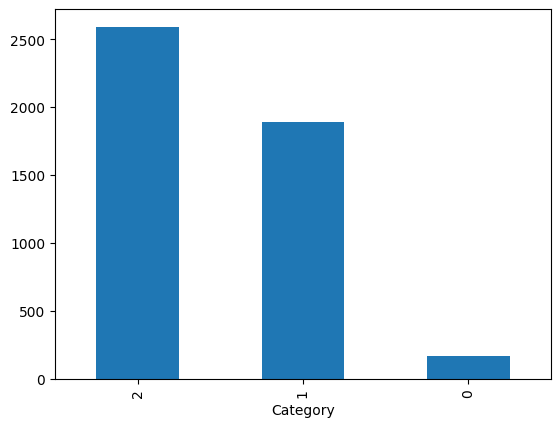

In [68]:
# menampilkan grafik jumlah data pada kolom Category

df['Category'].value_counts().plot(kind='bar')
print('Keterangan:')
print('0 = Tidak sehat')
print('1 = Sedang')
print('2 = Baik')
plt.show()

Sebelum dilakukan penyeimbangan data, atribut-atribut pada data dibagi terlebih dahulu menjadi features (X) dan label (y). Features (X) merupakan data yang akan dijadikan sebagai input untuk machine learning belajar. Sedangkan label (y) merupakan output dari hasil belajar model machine learning.

In [69]:
# membagi atribut menjadi features (X) dan label (y)

X = df[[
    'PM10',
    'PM2.5',
    'SO2',
    'CO',
    'O3',
    'NO2',
    'Max',
    'Critical Component_CO',
    'Critical Component_O3',
    'Critical Component_PM10',
    'Critical Component_PM2.5',
    'Critical Component_SO2'
    ]]
y = df['Category']

Setelah membagi atribut menjadi features (X) dan label (y), dilanjutkan dengan menyeimbangkan jumlah data berdasarkan label (y) menggunakan **Synthetic Minority Over-sampling Technique** (`SMOTE`). `SMOTE` merupakan sebuah teknik oversampling yang menciptakan sampel sintetis baru dari kelas minoritas (kelas/label yang jumlahnya lebih sedikit dari kelas/label lain) berdasarkan data-data yang sudah ada. Dengan sampel sintetis, maka variasi data yang asli dapat dijaga dan tidak menimbulkan duplikasi data.

In [70]:
# menyeimbangkan jumlah data berdasarkan atribut Category atau label (y)

oversampler = SMOTE()
X_resampled, y_resampled = oversampler.fit_resample(X, y)

Keterangan:
0 = Tidak sehat
1 = Sedang
2 = Baik


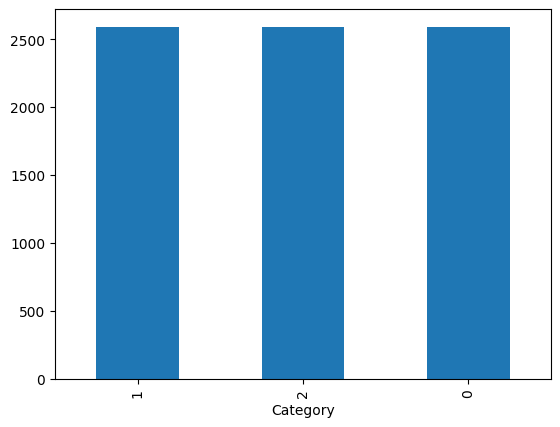

In [71]:
# menampilkan kembali jumlah data pada atribut Category atau label (y)

y_resampled.value_counts().plot(kind='bar')
print('Keterangan:')
print('0 = Tidak sehat')
print('1 = Sedang')
print('2 = Baik')
plt.show()

Standarisasi data merupakan teknik untuk mengubah nilai-nilai dari features (X) agar memiliki skala yang sama. Hal tersebut ditujukan untuk menghilangkan bias yang mungkin muncul yang dikarenakan perbedaan pada rentang nilai antar features (X). Untuk melakukan standarisasi data diperlukan sebuah library dari Scikit Learn yaitu `StandardScaler`.

In [72]:
# standarisasi data menggunakan Standard Scaler

scaler = StandardScaler()
scaler.fit(X_resampled)
X_resampled = scaler.transform(X_resampled)

## Training Model

Pelatihan model dilakukan menggunakan algoritma **Support Vector Machine (SVM)** dengan jumlah data latih sebesar 80% dan data uji sebesar 20%. Algoritma **SVM** yang digunakan memiliki konfigurasi bawaan sebagai berikut:
|Parameter|Value|
|---------|-----|
|C|1|
|kernel|RBF|
|gamma|scale|

In [73]:
# membagi data menjadi data latih (training data) dan data uji (test data)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [74]:
# pelatihan model menggunakan algoritma Support Vector Machine (SVM)

model = SVC()
model.fit(X_train, y_train)

SVC()

## Evaluation

Tahap evaluasi dilakukan untuk menilai akurasi dan performa dari model machine learning yang telah dilatih menggunakan data-data yang diberikan sebelumnya. Evaluasi model machine learning dilakukan dengan melihat skor akurasi, mengecek apakah model mengalami *overfitting/underfitting*, melihat *confusion matrix*, dan laporan hasil klasifikasi.

In [75]:
# menampilkan akurasi model

accuracy = model.score(X_test, y_test)
print('Accuracy :', accuracy)

Accuracy : 0.9755784061696658


Dengan nilai akurasi yang dihasilkan, dapat dikatakan bahwa model machine learning memiliki nilai akurasi yang bagus.

In [76]:
# memeriksa overfit/underfit

training_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print('Training accuracy :', training_accuracy)
print('Test accuracy :', test_accuracy)
print('Difference :', training_accuracy - test_accuracy)

Training accuracy : 0.9758842443729904
Test accuracy : 0.9755784061696658
Difference : 0.0003058382033245266


Selisih nilai akurasi pada data latih dan data uji sangat kecil yang menandakan bahwa model tidak mengalami *overfit* (nilai akurasi terlalu tinggi pada data latih tetapi rendah pada data uji) maupun *underfit* (nilai akurasi pada data latih dan data uji sama-sama rendah).

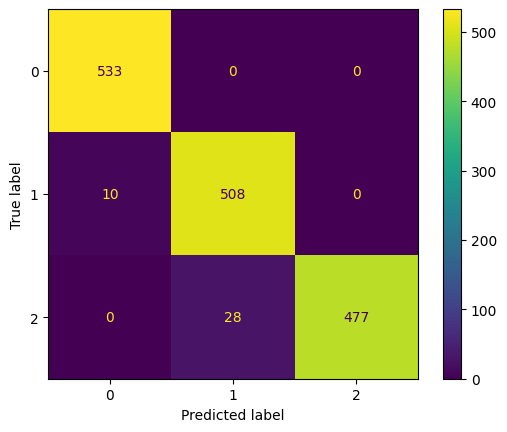

In [77]:
# menampilkan confusion matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

Hasil dari *Confusion Matrix* termasuk bagus karena model machine learning tidak menghasilkan prediksi yang membahayakan. Terlihat pada baris *True Label* `0 (TIDAK SEHAT)`, model tidak menghasilkan prediksi `1 (SEDANG)` ataupun `2 (BAIK)` yang berarti model memprediksi adanya polusi udara dengan tepat.

In [78]:
# melihat laporan klasifikasi

print(classification_report(y_test, y_pred, zero_division=0, digits=4))

              precision    recall  f1-score   support

           0     0.9816    1.0000    0.9907       533
           1     0.9478    0.9807    0.9639       518
           2     1.0000    0.9446    0.9715       505

    accuracy                         0.9756      1556
   macro avg     0.9764    0.9751    0.9754      1556
weighted avg     0.9763    0.9756    0.9756      1556



**Precision** merupakan nilai yang digunakan untuk mengukur sejauh mana model mengklasifikasikan sampel positif dengan baik. Precision dapat menjawab pertanyaan "Berapa persen data kualitas udara yang dikategorikan sebagai `BAIK (2)` dengan benar dari keseluruhan data yang diprediksi `BAIK`?".<br>
<br>
**Recall** merupakan nilai yang digunakan untuk mengukur sejauh mana model mengidentifikasi sampel positif yang sebenarnya. Recall dapat menjawab pertanyaan "Berapa persen data kualitas udara yang diprediksi `BAIK` dibandingkan dengan data kualitas udara yang sebenarnya?".<br>
<br>
**F1-score** merupakan perbandingan rata-rata precision dan recall yang telah dibobotkan. Jika **nilai F1-score semakin mendekati 1**, maka kinerja dan performa model machine learning **semakin baik**. Sebaliknya, jika **nilai F1-score semakin mendekati 0**, maka kinerja dan performa model machine learning **semakin buruk**.